<a href="https://colab.research.google.com/github/swilsonmfc/interpretability/blob/main/Dalex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DALEX
* moDel Agnostic Language for Exploration and eXplanation

![](https://github.com/ModelOriented/DALEX/raw/master/man/figures/logo.png)

# Install

In [4]:
!pip install dalex

# Setup

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from IPython.display import Image

import xgboost as xgb
import dalex as dx

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz

In [6]:
dx.__version__

'0.4.0'

# Data
* Pull in simple datasets to illustrate:
  * Binary
  * Multi-classification
  * Regression 
* Using simple data to focus effort on exploring the toolkit

In [7]:
boston = load_boston()
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['TARGET'] = boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
cancer_df.columns = [col.upper().replace(' ', '_') for col in cancer_df.columns]
cancer_df['TARGET'] = cancer['target']
cancer_df.head()

,MEAN_RADIUS,MEAN_TEXTURE,MEAN_PERIMETER,MEAN_AREA,MEAN_SMOOTHNESS,MEAN_COMPACTNESS,MEAN_CONCAVITY,MEAN_CONCAVE_POINTS,MEAN_SYMMETRY,MEAN_FRACTAL_DIMENSION,RADIUS_ERROR,TEXTURE_ERROR,PERIMETER_ERROR,AREA_ERROR,SMOOTHNESS_ERROR,COMPACTNESS_ERROR,CONCAVITY_ERROR,CONCAVE_POINTS_ERROR,SYMMETRY_ERROR,FRACTAL_DIMENSION_ERROR,WORST_RADIUS,WORST_TEXTURE,WORST_PERIMETER,WORST_AREA,WORST_SMOOTHNESS,WORST_COMPACTNESS,WORST_CONCAVITY,WORST_CONCAVE_POINTS,WORST_SYMMETRY,WORST_FRACTAL_DIMENSION,TARGET
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Binary Classification

In [9]:
X = cancer_df.copy()
y = X['TARGET']
X = X.drop(columns=['TARGET'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [10]:
boost = xgb.XGBClassifier(max_depth = 5, objective = 'binary:logistic', eval_metric='auc')
boost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [11]:
exp = dx.Explainer(boost, X_test, y_test)

Preparation of a new explainer is initiated

  -> data              : 143 rows 30 cols
  -> target variable   : Argument 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 143 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : not specified, model's class short name is taken instead (default)
  -> predict function  : <function yhat_proba_default at 0x7f2ce8fe3bf8> will be used (default)
  -> predict function  : accepts only pandas.DataFrame, numpy.ndarray causes problems
  -> predicted values  : min = 0.000897, mean = 0.605, max = 0.999
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.615, mean = 0.0107, max = 0.905
  -> model_info        : package xgboost

A new explainer has been created!


In [12]:
exp.data

,MEAN_RADIUS,MEAN_TEXTURE,MEAN_PERIMETER,MEAN_AREA,MEAN_SMOOTHNESS,MEAN_COMPACTNESS,MEAN_CONCAVITY,MEAN_CONCAVE_POINTS,MEAN_SYMMETRY,MEAN_FRACTAL_DIMENSION,RADIUS_ERROR,TEXTURE_ERROR,PERIMETER_ERROR,AREA_ERROR,SMOOTHNESS_ERROR,COMPACTNESS_ERROR,CONCAVITY_ERROR,CONCAVE_POINTS_ERROR,SYMMETRY_ERROR,FRACTAL_DIMENSION_ERROR,WORST_RADIUS,WORST_TEXTURE,WORST_PERIMETER,WORST_AREA,WORST_SMOOTHNESS,WORST_COMPACTNESS,WORST_CONCAVITY,WORST_CONCAVE_POINTS,WORST_SYMMETRY,WORST_FRACTAL_DIMENSION
107,12.36,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066,0.1199,0.8944,0.8484,9.227,0.003457,0.01047,0.011670,0.005558,0.01251,0.001356,13.290,27.49,85.56,544.1,0.11840,0.19630,0.19370,0.08442,0.2983,0.07185
437,14.04,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,0.05898,0.3892,1.0460,2.6440,32.740,0.007976,0.01295,0.016080,0.009046,0.02005,0.002830,15.660,21.58,101.20,750.0,0.11950,0.12520,0.11170,0.07453,0.2725,0.07234
195,12.91,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,0.1942,0.9086,1.4930,15.750,0.005298,0.01587,0.023210,0.008420,0.01853,0.002152,13.880,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949
141,16.11,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.05943,0.1861,0.06248,0.7049,1.3320,4.5330,74.080,0.006770,0.01938,0.030670,0.011670,0.01875,0.003434,19.920,25.27,129.00,1233.0,0.13140,0.22360,0.28020,0.12160,0.2792,0.08158
319,12.43,17.00,78.60,477.3,0.07557,0.03454,0.01342,0.01699,0.1472,0.05561,0.3778,2.2000,2.4870,31.160,0.007357,0.01079,0.009959,0.011200,0.03433,0.002961,12.900,20.21,81.76,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,0.05932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,0.05961,0.7275,1.1930,4.8370,102.500,0.006458,0.02306,0.029450,0.015380,0.01852,0.002608,26.140,28.14,170.10,2145.0,0.16240,0.35110,0.38790,0.20910,0.3537,0.08294
116,8.95,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,0.3132,0.9789,3.2800,16.940,0.018350,0.06760,0.092630,0.023080,0.02384,0.005601,9.414,17.07,63.34,270.0,0.11790,0.18790,0.15440,0.03846,0.1652,0.07722
468,17.60,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.10020,0.1696,0.07369,0.9289,1.4650,5.8010,104.900,0.006766,0.07025,0.065910,0.023110,0.01673,0.011300,21.570,28.87,143.60,1437.0,0.12070,0.47850,0.51650,0.19960,0.2301,0.12240
469,11.62,18.18,76.38,408.8,0.11750,0.14830,0.10200,0.05564,0.1957,0.07255,0.4101,1.7400,3.0270,27.850,0.014590,0.03206,0.049610,0.018410,0.01807,0.005217,13.360,25.40,88.14,528.1,0.17800,0.28780,0.31860,0.14160,0.2660,0.09270


## Performance
* How well does our model approximate unseen data?

In [13]:
pred = exp.predict(X_test)
pred_class = np.where(pred > 0.5, 1, 0)
pred

array([9.9674302e-01, 9.9845111e-01, 9.9878722e-01, 2.5009859e-02,
       9.9564987e-01, 9.9876958e-01, 9.9813014e-01, 1.4612498e-03,
       9.9864131e-01, 9.9784517e-01, 5.1518823e-03, 9.8864764e-01,
       9.5676112e-01, 9.9696523e-01, 2.0704090e-03, 9.9729222e-01,
       9.9830222e-01, 9.9865997e-01, 8.9735945e-04, 4.4598678e-01,
       9.9378717e-01, 9.8949653e-01, 9.9368697e-01, 9.9828941e-01,
       1.6352285e-03, 9.1177708e-01, 4.8987046e-03, 9.9912792e-01,
       1.1220248e-03, 1.8138690e-01, 5.5565208e-01, 4.4957539e-03,
       9.9131536e-01, 1.1938715e-01, 9.9873608e-01, 9.9932623e-01,
       3.8097739e-02, 4.5435742e-02, 2.7041298e-03, 1.3398462e-03,
       1.7871964e-03, 9.9865675e-01, 9.9785310e-01, 9.6947664e-01,
       9.9752051e-01, 9.9741518e-01, 1.1220248e-03, 9.2609638e-01,
       1.9155974e-02, 9.9812382e-01, 1.0334369e-03, 9.7690636e-01,
       9.8035127e-01, 1.4612498e-03, 9.9719572e-01, 9.9800879e-01,
       1.4612498e-03, 2.2150183e-03, 9.9771667e-01, 9.9697000e

In [14]:
print(classification_report(y_test, pred_class))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [15]:
mp = exp.model_performance(model_type = 'classification')
mp.result

,recall,precision,f1,accuracy,auc
XGBClassifier,0.988636,0.988636,0.988636,0.986014,0.998347


In [16]:
exp.model_performance('classification').plot()

## Global


In [17]:
exp.model_parts().plot()

## Shap
* Shap is based on Shapley values which arise from game theory
* In this sense:
  * The game consists of the model predictions
  * The players are model features
* Shapley values then quantify the contribution of each player in the game

In [18]:
test_case = X_test.iloc[0]

In [19]:
sh_case = exp.predict_parts(test_case, type='shap', B=10)
sh_case.result.label = "Case"

In [20]:
sh_case.result.loc[sh_case.result.B == 0, ]

,variable,contribution,variable_name,variable_value,sign,label,B
0,WORST_AREA = 544.1,0.093045,WORST_AREA,544.100000,1.0,Case,0
1,AREA_ERROR = 9.227,0.080083,AREA_ERROR,9.227000,1.0,Case,0
2,WORST_CONCAVE_POINTS = 0.08442,0.075383,WORST_CONCAVE_POINTS,0.084420,1.0,Case,0
3,MEAN_CONCAVE_POINTS = 0.01921,0.040312,MEAN_CONCAVE_POINTS,0.019210,1.0,Case,0
4,WORST_CONCAVITY = 0.1937,0.027568,WORST_CONCAVITY,0.193700,1.0,Case,0
5,WORST_RADIUS = 13.29,0.023914,WORST_RADIUS,13.290000,1.0,Case,0
6,MEAN_SMOOTHNESS = 0.08477,0.017521,MEAN_SMOOTHNESS,0.084770,1.0,Case,0
7,WORST_PERIMETER = 85.56,0.016740,WORST_PERIMETER,85.560000,1.0,Case,0
8,COMPACTNESS_ERROR = 0.01047,-0.011443,COMPACTNESS_ERROR,0.010470,-1.0,Case,0
9,MEAN_TEXTURE = 18.54,0.008809,MEAN_TEXTURE,18.540000,1.0,Case,0


In [21]:
sh_case.plot(bar_width = 16)

## Breakdown
* Model Agnostic
* Applied to a single prediction of a model
* Easy to understand (show how variables affect a prediction)
* Can be misleading with respect to interactions
* Models with many explanatory variables can have complicated plots 

In [22]:
test_case = X_test.iloc[0]

In [23]:
bd_case = exp.predict_parts(test_case, type='break_down')
bd_case_interactions = exp.predict_parts(test_case, type='break_down_interactions')

bd_case.result.label = "Case"
bd_case_interactions.result.label = "Case+Interactions"

In [24]:
bd_case

,variable_name,variable_value,variable,cumulative,contribution,sign,position,label
0,intercept,1,intercept,0.604693,0.604693,1.0,31,Case
1,WORST_AREA,544.1,WORST_AREA = 544.1,0.661224,0.056531,1.0,30,Case
2,WORST_CONCAVE_POINTS,0.08442,WORST_CONCAVE_POINTS = 0.08442,0.780142,0.118918,1.0,29,Case
3,MEAN_CONCAVE_POINTS,0.01921,MEAN_CONCAVE_POINTS = 0.01921,0.833489,0.053346,1.0,28,Case
4,AREA_ERROR,9.227,AREA_ERROR = 9.227,0.962515,0.129027,1.0,27,Case
5,WORST_RADIUS,13.29,WORST_RADIUS = 13.29,0.985560,0.023044,1.0,26,Case
6,WORST_CONCAVITY,0.1937,WORST_CONCAVITY = 0.1937,0.994196,0.008636,1.0,25,Case
7,WORST_SMOOTHNESS,0.1184,WORST_SMOOTHNESS = 0.1184,0.996457,0.002261,1.0,24,Case
8,MEAN_TEXTURE,18.54,MEAN_TEXTURE = 18.54,0.996549,0.000092,1.0,23,Case
9,MEAN_SMOOTHNESS,0.08477,MEAN_SMOOTHNESS = 0.08477,0.996951,0.000402,1.0,22,Case


In [25]:
bd_case.plot(bd_case_interactions)

## Partial Dependence
* Plot that shows the marginal effect of a feature on the outcome
* You can interpret partial dependence -- how does the target value respond as as function of features

In [26]:
pdp_num = exp.model_profile(type = 'partial')
pdp_num.result["_label_"] = 'pdp'

ale_num = exp.model_profile(type = 'accumulated')
ale_num.result["_label_"] = 'ale'

Calculating accumulated dependency: 100%|██████████| 30/30 [00:03<00:00,  7.73it/s]


In [27]:
pdp_num.plot(ale_num)

## Surrogate
* Create a global surrogate model that is highly explainable from a black box model
* Supports approximating a model into:
  * Decision Tree
  * Linear Model
* Helpful for understanding model and key relationships
* Control the depth and maximum number of variables to consider
* Investigate & compare the performance of the surrogate

### Decision Tree

In [28]:
dtree = exp.model_surrogate(type='tree')

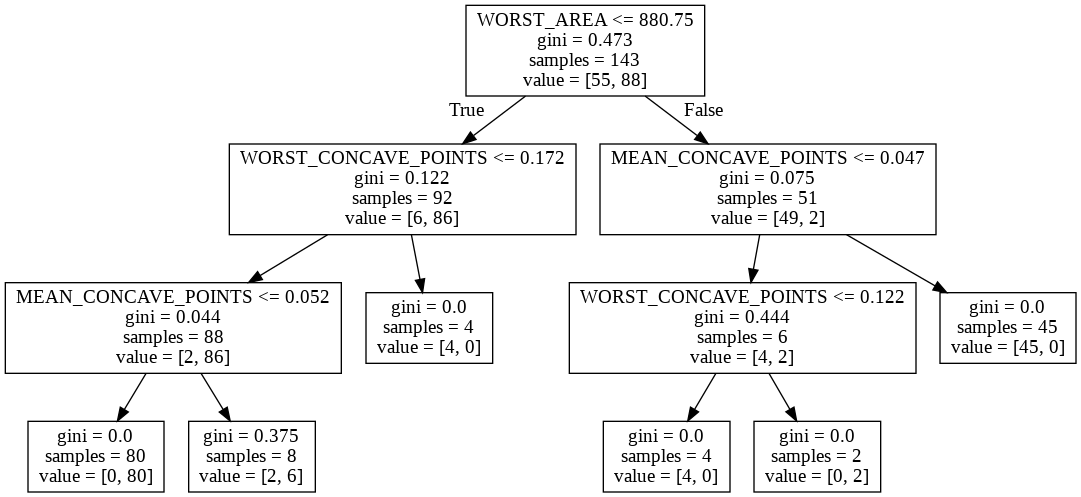

In [29]:
dot_data = export_graphviz(dtree, out_file=None, feature_names=dtree.feature_names)
graph = graphviz.Source(dot_data)
graph.format = 'png'
Image(data=graph.pipe())

### Linear Model

In [30]:
linear = exp.model_surrogate(type='linear')
print(type(linear))

<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [31]:
pd.DataFrame.from_dict({'Features': linear.feature_names, 
                        'Coefficients': + linear.coef_.squeeze()}, 
                       orient='index').transpose()

,Features,Coefficients
0,MEAN_AREA,0.0119995
1,WORST_AREA,-0.017998
2,WORST_RADIUS,-0.320745
3,MEAN_CONCAVE_POINTS,-0.197719
4,WORST_CONCAVE_POINTS,-0.479639


# Regression

In [32]:
X = boston_df.copy()
y = X['TARGET']
X = X.drop(columns=['TARGET'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [33]:
boost = xgb.XGBRegressor(max_depth = 5, objective = 'reg:squarederror', eval_metric='rmse')
boost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
             gamma=0, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
             n_estimators=100, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [34]:
exp = dx.Explainer(boost, X_test, y_test)

Preparation of a new explainer is initiated

  -> data              : 127 rows 13 cols
  -> target variable   : Argument 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 127 values
  -> model_class       : xgboost.sklearn.XGBRegressor (default)
  -> label             : not specified, model's class short name is taken instead (default)
  -> predict function  : <function yhat_default at 0x7f2ce8fe3a60> will be used (default)
  -> predict function  : accepts only pandas.DataFrame, numpy.ndarray causes problems
  -> predicted values  : min = 5.7, mean = 23.7, max = 48.1
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -24.1, mean = -0.0445, max = 9.37
  -> model_info        : package xgboost

A new explainer has been created!


## Performance

In [35]:
mp = exp.model_performance(model_type = 'regression')
mp.result

,mse,rmse,r2,mae,mad
XGBRegressor,13.985953,3.73978,0.866326,2.459377,1.739232


## Global

In [36]:
exp.model_parts().plot()

In [37]:
pred = exp.predict(X_test)
pred

array([45.499638 , 34.157772 , 11.047699 , 15.226247 , 28.218544 ,
       32.76306  , 41.678375 , 13.552792 , 38.02764  ,  5.6997867,
       26.83235  , 13.791164 , 19.50035  , 20.880945 , 20.989119 ,
       27.073185 ,  5.965573 , 32.71215  , 25.342249 , 23.158674 ,
       11.119596 , 21.38624  , 20.410894 , 33.93213  , 35.872032 ,
       21.275227 , 25.863924 , 16.24572  , 45.77281  , 30.50566  ,
       21.457989 , 19.117203 , 34.977356 , 44.73238  , 28.241976 ,
       24.8486   , 14.749357 , 19.891548 ,  7.3208795, 32.158867 ,
       22.452877 , 21.38144  , 41.192722 , 10.795982 , 20.551914 ,
       23.022686 , 28.535631 , 15.869705 , 24.758984 , 31.033203 ,
       35.49536  , 45.998417 , 21.762331 , 25.744194 , 33.96242  ,
       18.770866 , 18.586748 , 18.17741  , 22.03433  , 18.974756 ,
       34.418465 , 12.194635 , 22.45494  , 20.67882  ,  9.050617 ,
       24.397144 , 24.573015 , 19.052595 , 12.439303 , 19.530523 ,
       19.906218 , 22.363117 , 17.68357  , 20.272358 , 25.1188

## Shap

In [38]:
test_case = X_test.iloc[0]

In [39]:
sh_case = exp.predict_parts(test_case, type='shap', B=10)
sh_case.result.label = "Case"

In [40]:
sh_case.result.loc[sh_case.result.B == 0, ]

,variable,contribution,variable_name,variable_value,sign,label,B
0,RM = 7.875,12.471867,RM,7.87500,1.0,Case,0
1,LSTAT = 2.97,7.411027,LSTAT,2.97000,1.0,Case,0
2,PTRATIO = 14.4,1.929668,PTRATIO,14.40000,1.0,Case,0
3,AGE = 32.0,1.343020,AGE,32.00000,1.0,Case,0
4,DIS = 5.648,-1.081041,DIS,5.64840,-1.0,Case,0
5,CRIM = 0.01381,-0.731849,CRIM,0.01381,-1.0,Case,0
6,NOX = 0.422,0.257553,NOX,0.42200,1.0,Case,0
7,TAX = 255.0,0.190150,TAX,255.00000,1.0,Case,0
8,RAD = 4.0,0.134302,RAD,4.00000,1.0,Case,0
9,INDUS = 0.46,-0.095018,INDUS,0.46000,-1.0,Case,0


In [41]:
sh_case.plot(bar_width = 16)

## Breakdown

In [42]:
test_case = X_test.iloc[0]

In [43]:
bd_case = exp.predict_parts(test_case, type='break_down')
bd_case_interactions = exp.predict_parts(test_case, type='break_down_interactions')

bd_case.result.label = "Case"
bd_case_interactions.result.label = "Case+Interactions"

In [44]:
bd_case_interactions

,variable_name,variable_value,variable,cumulative,contribution,sign,position,label
0,intercept,1,intercept,23.738188,23.738188,1.0,14,Case+Interactions
1,LSTAT,2.97,LSTAT = 2.97,32.455975,8.717787,1.0,13,Case+Interactions
2,RM,7.875,RM = 7.875,41.883793,9.427818,1.0,12,Case+Interactions
3,AGE,32.0,AGE = 32.0,44.363689,2.479897,1.0,11,Case+Interactions
4,PTRATIO,14.4,PTRATIO = 14.4,46.923553,2.559864,1.0,10,Case+Interactions
5,NOX,0.422,NOX = 0.422,47.349579,0.426025,1.0,9,Case+Interactions
6,DIS,5.648,DIS = 5.648,46.777081,-0.572498,-1.0,8,Case+Interactions
7,TAX,255.0,TAX = 255.0,46.909748,0.132668,1.0,7,Case+Interactions
8,CRIM,0.01381,CRIM = 0.01381,45.890385,-1.019363,-1.0,6,Case+Interactions
9,INDUS,0.46,INDUS = 0.46,45.539986,-0.350399,-1.0,5,Case+Interactions


In [45]:
bd_case.plot(bd_case_interactions)

## Partial Dependence

In [46]:
pdp_num = exp.model_profile(type = 'partial')
pdp_num.result["_label_"] = 'pdp'

ale_num = exp.model_profile(type = 'accumulated')
ale_num.result["_label_"] = 'ale'

Calculating accumulated dependency: 100%|██████████| 13/13 [00:01<00:00,  8.62it/s]


In [47]:
pdp_num.plot(ale_num)

## Surrogate

### Decision Tree

In [48]:
dtree = exp.model_surrogate(type='tree')

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:1233: FutureWarning:

the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.



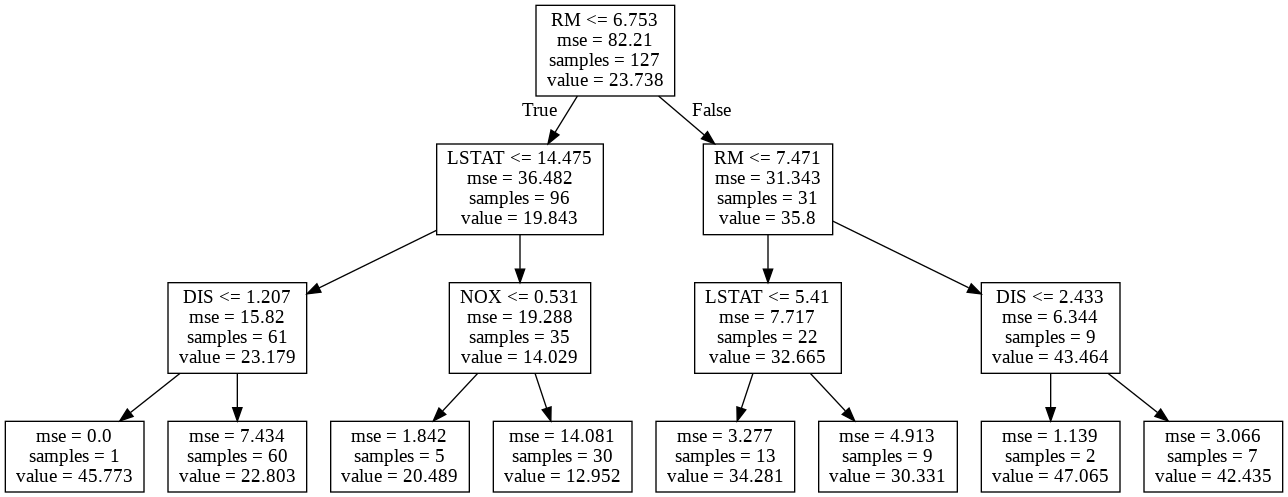

In [49]:
dot_data = export_graphviz(dtree, out_file=None, feature_names=dtree.feature_names)
graph = graphviz.Source(dot_data)
graph.format = 'png'
Image(data=graph.pipe())

### Linear Model

In [50]:
linear = exp.model_surrogate(type='linear')
print(type(linear))

<class 'sklearn.linear_model._base.LinearRegression'>


In [51]:
pd.DataFrame.from_dict({'Features':['INTERCEPT'] + linear.feature_names, 
                        'Coefficients':[linear.intercept_] + linear.coef_.squeeze()}, 
                       orient='index').transpose()

,Features,Coefficients
0,INTERCEPT,22.3342
1,PTRATIO,22.3029
2,DIS,9.47658
3,NOX,27.6525
4,RM,22.5122
5,LSTAT,None
